#Ndiogou MBODJ
# Problem: Logistic regression

In this exercice we consider students that apply to a Master program in an University. Their chance of being accepted depend on several criteria among which the marks they obtained to two exams (called Exam1 and Exam2).

We want to build a simple probabilistic model based only on the results obtained for these two exams. For this we use Logistic Regression to calculate the probability for a student to be accepted to the Master program given the marks he obtained for each exam:

$$\text{p(accepted)} = \sigma(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2}),$$

where $\sigma()$ is the sigmoid function.

By analysing the success rate of the applicants of the previous years it was possible to determine the weights of this model, and these were estimated to be:

$$ w_0 = -44.997, w_1 = 0.36357, w_2 = 0.35662$$

In this exercice we would like to estimate the probability of 100 new students to be accepted to the Master program given the marks that they obtained to their exams.


### Initialize

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 0) Question on lecture

Explain how the model is trained:

a) What is the loss function used here and why ?

b) What method is used to minimize the loss function ?

c) How are determined the weights $w_0$, $w_1$ and $w_2$ ?


## 1) The data
The text file below contains the marks obtained by 100 students at the two exams. 

a) Print the first 10 entries of the file.

b) Represent this dataset on a figure with two axes: Exam1 and Exam2.

In [3]:
#a)Pour visionner ce que cela donne EXAM1 et EXAM2 with pandas
student_marks0=pd.read_csv('marks_nolabels.txt', delimiter=',',names=['Exam1','Exam2'])
student_marks0[:10] #Les 10 premieres entrées de la liste

,Exam1,Exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
5,45.083277,56.316372
6,61.106665,96.511426
7,75.024746,46.554014
8,76.098787,87.420570
9,84.432820,43.533393


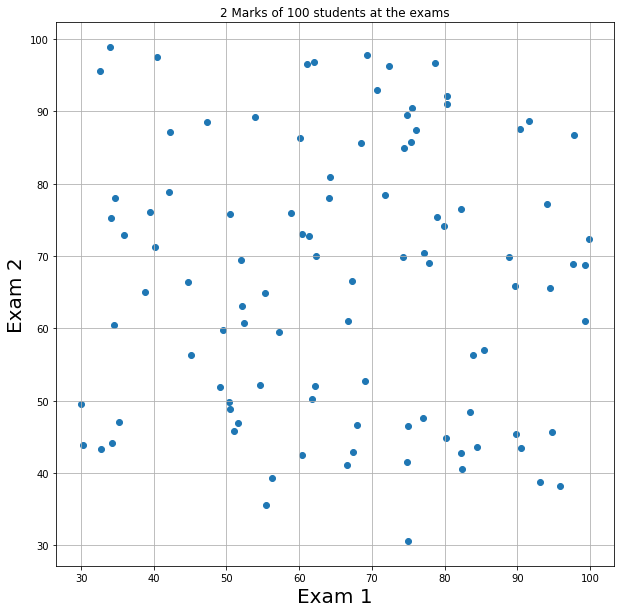

In [12]:
#b)The fugur of dataSet
X=student_marks0['Exam1']
Y=student_marks0['Exam2']
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlabel('Exam 1',fontsize=20)
axes.set_ylabel('Exam 2',fontsize=20)
axes.grid()
plt.scatter(X,Y)
plt.title('2 Marks of 100 students at the exams')
plt.show()

In [16]:
student_marks0['Exam1'][:10] #les 10 premieres valeurs de 'EXAM1'

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
5    45.083277
6    61.106665
7    75.024746
8    76.098787
9    84.432820
Name: Exam1, dtype: float64

In [17]:
# Load and read file
from numpy import genfromtxt
student_marks = genfromtxt('marks_nolabels.txt', delimiter=',') #
print('%13s %14s'% ('Exam1', 'Exam2'))

#The First 10 entries of the file
student_marks[:10,:]

        Exam1          Exam2


array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331]])

In [18]:
student_marks.shape

(100, 2)

In [235]:
#student_marks[:,0] #to have all the values for Exam 1 for the axis 1

In [116]:
# Show data in one fig
#fig, axes = plt.subplots(figsize=(8,8))
#axes.plot(student_marks[:,0],'bo',lw=1,label='Examen 1')
#axes.plot(student_marks[:,1],'rs',lw=1,label='Examen 2')
#axes.set_xlabel('EXAM 1',fontsize=12)
#axes.set_ylabel('EXAM 2',fontsize=12)
#axes.grid()
#plt.legend(loc='upper right',fontsize=20)

## 2) The model

a) Write two functions, `sigmoid(x)` and `dsig(x)` that returns, respectively $\sigma(x)$ and $\frac{\text{d} \sigma}{\text{d} x}(x)$.

b) Write a function `predict` that returns the probability for each student to be accepted by the University.

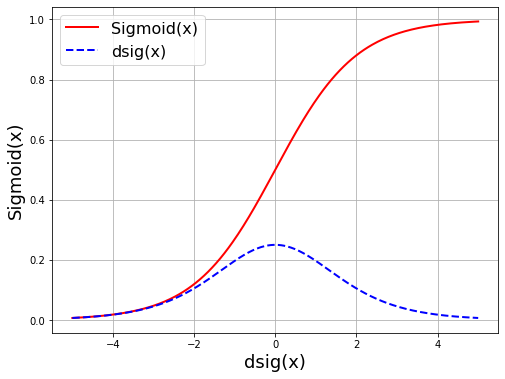

In [19]:
#The sigmoid function is also called the logistic function
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#The dsig function
def dsig(x):
    return sigmoid(x)*(1-sigmoid(x))

# Plot sigmoid(x) and dsig(x) function 
x = np.linspace(-5,5,300)
fig, axes = plt.subplots(figsize=(8,6))
axes.plot(x,sigmoid(x),'r-',lw=2,label='Sigmoid(x)')
axes.plot(x,dsig(x),'b--',lw=2,label='dsig(x)')
axes.set_xlabel('dsig(x)',fontsize=18)
axes.set_ylabel('Sigmoid(x)',fontsize=18)
axes.grid()
plt.legend(loc='upper left',fontsize=16)

In [64]:
#We have to make them in the same dimension
weights = np.array([-44.997, 0.36357, 0.35662]) #shape (3,1)
weights= weights.reshape(weights.shape[0],1)

#features is (100, 2) so i have to add a column to have (100,3)
features=student_marks[:,:]
const = np.ones(shape=(len(features),1)) #i tried to use np.hstack but it doesn't work as i want
features = np.append(const, features, axis=1)

print('The Weights Shape is:',weights.shape)
print('The Features Shape is:',features.shape)


The Weights Shape is: (3, 1)
The Features Shape is: (100, 3)


In [62]:
weights

array([[-44.997  ],
       [  0.36357],
       [  0.35662]])

In [60]:
features.T

(3, 100)

In [66]:
#We'll use a trained model
def predict(features,weights):
    z = np.dot(features, weights)
    return sigmoid(z)

## 3) Probabilities

a) With the values of the weights $w_0,w_1,w_2$ given above calculate the probability for each student to be accepted. Represent the distribution of all probabilities in a histogram.

b) For a threshold of p(accepted) = 0.5 how many how many students are predicted to pass or fail the acceptation at the University ?

The len of probability is 100
............
[[1.01135902e-02]
 [1.09292128e-08]
 [2.55900181e-03]
 [9.99530299e-01]
 [9.99975240e-01]]


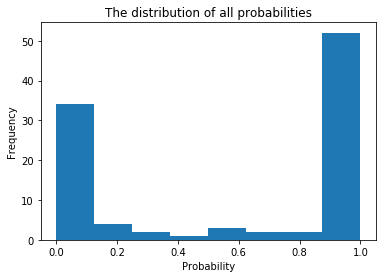

In [81]:
#a) With the values of Weights Wo,W1,W2 calculate the probability for each student to be accepted
probability=predict(features,weights)
print('The len of probability is',len(probability))
print('............')
print(probability[:5])

#The histogram of probability distribution
plt.hist(probability, bins='auto')
plt.xlabel('Probability')
plt.ylabel('Frequence')
plt.title('The distribution of all probabilities')
plt.show()

In [86]:
#b)The number of students predicted to pass or refused for the acceptation
#p(accepted)=0.5
accepted = 0
refused = 0
for i in range(len(probability)):
    if probability[i] >= 0.5:
        accepted += 1
    else:
        refused += 1
print('The University has accepted is',accepted,'students')
print('The University has refused is',refused,'students')

The University has accepted is 59 students
The University has refused is 41 students


## 4) Results

a) Represent the data in a figure with two axes (Exam1 and Exam2). Show with a red marker students that are predicted to fail the admission and with a blue marker students who are predicted to pass.

b) Modify this figure showing this time the markers with a color depending on the probability value: from dark red for low probabilities to dark blue for high probabilities.

c) Add a line showing the decision boundary separing both classes.  Hint: this line correspond to points for which p(accepted)=0.5, that is, students for which the weighted sum is such that $(w_0 + w_1 \cdot \text{Exam1} + w_2 \cdot \text{Exam2})=0$.

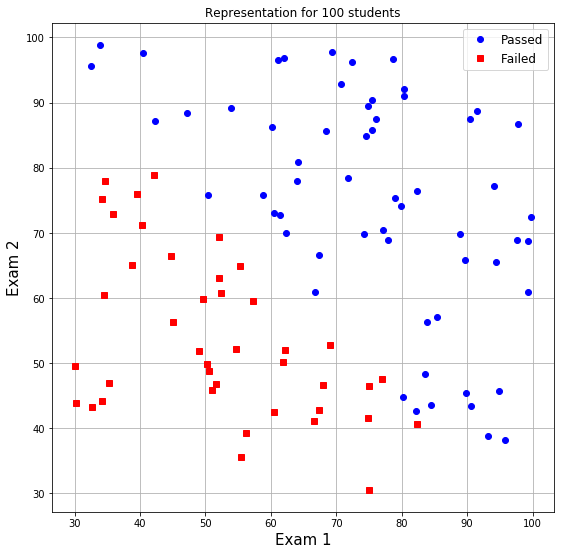

In [118]:
#a)Representation of the data with 2 axes
#The labels
labels = []
for i in range(len(probability)):
    if probability[i] >= 0.5:
        labels.append(1)
    else:
        labels.append(0)
        
labels = np.asarray(labels)
labels.shape = (np.size(labels),1) # in order to have the same number of dimension

data = np.append(features, probability, axis=1)
data_all = np.append(data, labels, axis=1)

labels=data_complete[:,4]

student_passed = data_all[labels == 1]
student_failed = data_all[labels == 0]

# Show data
fig, axes = plt.subplots(figsize=(9,9))
axes.plot(student_passed[:,1],student_passed[:,2],'bo',lw=1,label='Passed')
axes.plot(student_failed[:,1],student_failed[:,2],'rs',lw=1,label='Failed')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)
axes.grid()

plt.title('Representation for 100 students',fontsize=12)
plt.legend(loc='upper right',fontsize=12)

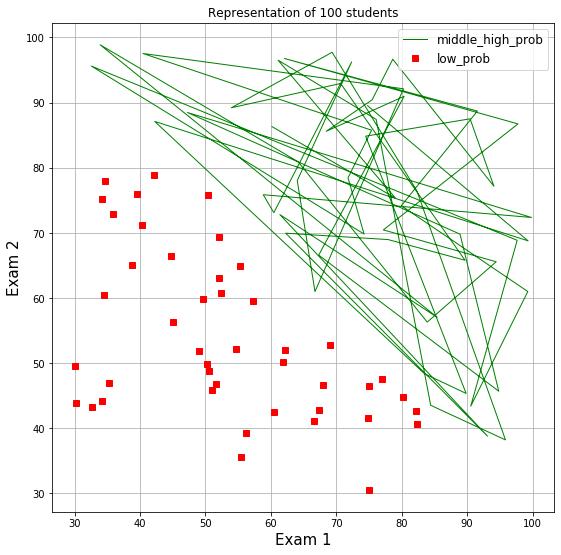

In [120]:
#b)low_proba high_proba
low_prob = data_all[data_all[:,3] <=.66]
middle_high_prob = data_all[data_all[:,3]>.66]

#show data
fig, axes = plt.subplots(figsize=(9,9))
axes.plot(middle_high_prob[:,1],middle_high_prob[:,2],'g',lw=1,label='middle_high_prob')
axes.plot(low_prob[:,1],low_prob[:,2],'rs',lw=1,label='low_prob')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)

axes.grid()

plt.title('Representation of 100 students',fontsize=12)
plt.legend(loc='upper right',fontsize=12)

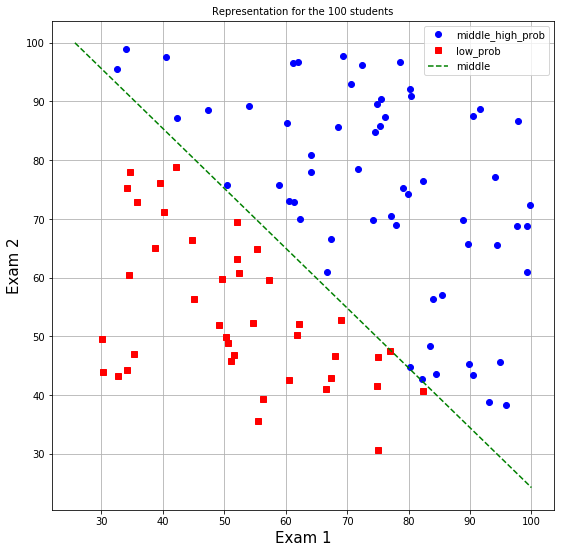

In [121]:
low_prob = data_all[data_all[:,3] <.5]
middle_high_prob = data_all[data_all[:,3]>=.5]

#show data
fig, axes =plt.subplots(figsize=(9,9))
axes.plot(middle_high_prob[:,1],middle_high_prob[:,2],'bo',lw=1,label='middle_high_prob')
axes.plot(low_prob[:,1],low_prob[:,2],'rs',lw=1,label='low_prob')
axes.set_xlabel('Exam 1',fontsize=15)
axes.set_ylabel('Exam 2',fontsize=15)
plt.plot([25.675, 100],[100,24.227],linestyle='--',color='g',label='middle')
axes.grid()
plt.title('Representation for the 100 students',fontsize=10)
plt.legend(loc='upper right',fontsize=10)

************************************************

# Exercices

All questions below are independent of each other. 

## 1) Neural network with Pytorch

Look below at the pytorch implementation of a fully connected neural network (do not try to run the cell). 

a) How is called this specific NN architecture ? In which cases can it be used ?

b) How many weights, including bias terms, need to be determined for each layer and in total for this network ?

c) Modify the code by introducing two layers of dimension `hidden_layer2=25` with a sigmoid activitation function.
Be careful to respect this specific NN architecture.

## 2) Implementation of a simple NN with Numpy

In the chap.3 of the lectures, pages 54-56, an illustration of a NN calculation is given. 

a) Implement this example, using **only** the `numpy` library, and check you obtain the same results as in page 56 after 1 iteration. For this define all necessary functions, apply forward pass and backward pass, etc.

b) Give the result (weights, output value) after another iteration. 

In [123]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np

## 3) Regression

Describe the figure below. What is the difference between these models ? Which one seems to generalize better ?

By the way is this figure an example of linear regression ? Why ?

<center><img src="fit.png" width="600" /></center>
